# Assignment 2: Route Finder Using Bi-Directional BFS/DFS 
Objective: Use Bi-directional BFS/DFS to solve a navigation problem. 
Problem Statement: Represent a city map as a graph where intersections are nodes 
and roads are edges. Find the shortest path between two locations. 
Tasks: 
⚫ Implement Bi-directional BFS to minimize the number of nodes explored. 
⚫ Compare the performance of Bi-directional BFS with standard BFS and DFS. 
⚫ Visualize the search process (e.g., using a library like networkx in Python). 

Bi-directional BFS Path: ['A', 'C', 'F', 'I']
BFS Path: ['A', 'C', 'F', 'I']
DFS Path: ['A', 'C', 'F', 'I']


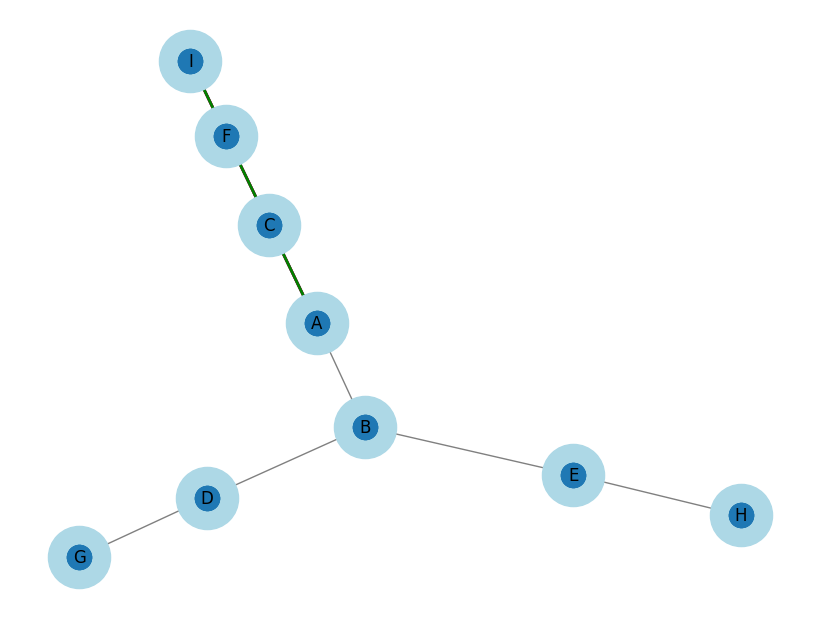

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

def bidirectional_bfs(graph, start, goal):
    if start == goal:
        return [start]
    
    forward_queue, backward_queue = deque([(start, [start])]), deque([(goal, [goal])])
    forward_visited, backward_visited = {start: [start]}, {goal: [goal]}
    
    while forward_queue and backward_queue:
        if forward_queue:
            node, path = forward_queue.popleft()
            for neighbor in graph[node]:
                if neighbor not in forward_visited:
                    forward_visited[neighbor] = path + [neighbor]
                    forward_queue.append((neighbor, path + [neighbor]))
                    if neighbor in backward_visited:
                        return forward_visited[neighbor] + backward_visited[neighbor][::-1][1:]
        
        if backward_queue:
            node, path = backward_queue.popleft()
            for neighbor in graph[node]:
                if neighbor not in backward_visited:
                    backward_visited[neighbor] = path + [neighbor]
                    backward_queue.append((neighbor, path + [neighbor]))
                    if neighbor in forward_visited:
                        return forward_visited[neighbor] + backward_visited[neighbor][::-1][1:]
    
    return None

def bfs(graph, start, goal):
    queue = deque([(start, [start])])
    visited = set()
    
    while queue:
        node, path = queue.popleft()
        if node == goal:
            return path
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))
    
    return None

def dfs(graph, start, goal, path=None, visited=None):
    if path is None:
        path = [start]
    if visited is None:
        visited = set()
    
    if start == goal:
        return path
    
    visited.add(start)
    for neighbor in graph[start]:
        if neighbor not in visited:
            new_path = dfs(graph, neighbor, goal, path + [neighbor], visited)
            if new_path:
                return new_path
    
    return None

def visualize_graph(graph, path_bidirectional, path_bfs, path_dfs):
    G = nx.Graph()
    for node, edges in graph.items():
        for neighbor in edges:
            G.add_edge(node, neighbor)
    
    pos = nx.spring_layout(G)
    
    plt.figure(figsize=(8,6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
    
    if path_bidirectional:
        edges_bidirectional = [(path_bidirectional[i], path_bidirectional[i+1]) for i in range(len(path_bidirectional)-1)]
        nx.draw(G, pos, edgelist=edges_bidirectional, edge_color='blue', width=2)
    
    if path_bfs:
        edges_bfs = [(path_bfs[i], path_bfs[i+1]) for i in range(len(path_bfs)-1)]
        nx.draw(G, pos, edgelist=edges_bfs, edge_color='red', width=2)
    
    if path_dfs:
        edges_dfs = [(path_dfs[i], path_dfs[i+1]) for i in range(len(path_dfs)-1)]
        nx.draw(G, pos, edgelist=edges_dfs, edge_color='green', width=2)
    
    plt.show()

if __name__ == "__main__":
    city_graph = {
        'A': ['B', 'C'],
        'B': ['A', 'D', 'E'],
        'C': ['A', 'F'],
        'D': ['B', 'G'],
        'E': ['B', 'H'],
        'F': ['C', 'I'],
        'G': ['D'],
        'H': ['E'],
        'I': ['F']
    }
    
    start, goal = 'A', 'I'
    
    path_bidirectional = bidirectional_bfs(city_graph, start, goal)
    path_bfs = bfs(city_graph, start, goal)
    path_dfs = dfs(city_graph, start, goal)
    
    print(f"Bi-directional BFS Path: {path_bidirectional}")
    print(f"BFS Path: {path_bfs}")
    print(f"DFS Path: {path_dfs}")
    
    visualize_graph(city_graph, path_bidirectional, path_bfs, path_dfs)